<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/%E6%B5%85%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%AE%9E%E7%8E%B0%E5%B9%B3%E9%9D%A2%E6%95%B0%E6%8D%AE%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './drive/My Drive/data/浅层神经网络实现平面数据分类')
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [0]:
X, Y = load_planar_dataset()

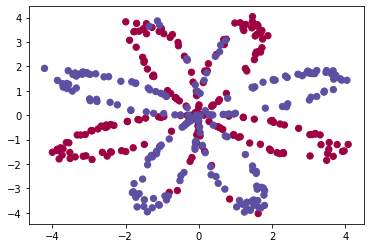

In [53]:
plt.scatter(X[0, :], X[1, :], c=Y.reshape(X[0,:].shape), s=40, cmap=plt.cm.Spectral)

In [54]:
shape_X=X.shape
shape_Y=Y.shape
m=shape_X[1]
print(shape_X,shape_Y,m)

(2, 400) (1, 400) 400


In [55]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


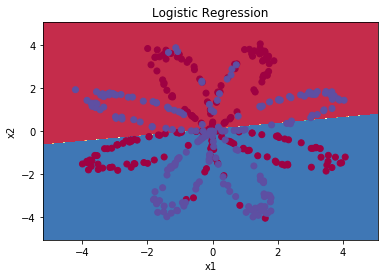

In [56]:

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [0]:
def layer_sizes(X,Y):
  n_x=X.shape[0]
  n_h=4
  n_y=Y.shape[0]
  return (n_x,n_h,n_y)



In [58]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [0]:
def initialize_parameters(n_x,n_h,n_y):
  np.random.seed(2)
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
  return parameters


In [62]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [0]:
def forward_propagation(X, parameters):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  
  Z1=np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)
  assert(A2.shape == (1, X.shape[1]))

  cache={"A1":A1,"Z1":Z1,"A2":A2,"Z2":Z2}

  return A2,cache





In [85]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [0]:
def compute_cost(A2, Y, parameters):
  m=Y.shape[1]
  logprobs = Y*np.log(A2)+(1-Y)*np.log(1-A2)
  cost=-(1.0/m)*np.sum(logprobs)
  cost = np.squeeze(cost)  
  assert(isinstance(cost, float))
  return cost

In [66]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


In [0]:
def backward_propagation(parameters, cache, X, Y):
  m=X.shape[1]
  W1=parameters["W1"]
  W2=parameters["W2"]
  A2=cache["A2"]
  A1=cache["A1"]

  dZ2=A2-Y
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
  dW1=(1/m)*np.dot(dZ1,X.T)
  db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)

  grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
  

  return grads



In [89]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [0]:
def update_parameters(parameters, grads, learning_rate = 1.2):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W2=W2-learning_rate*dW2
  b2=b2-learning_rate*db2
  W1=W1-learning_rate*dW1
  b1=b1-learning_rate*db1


  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
  return parameters


In [93]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [0]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
  np.random.seed(3)
  n_x = layer_sizes(X, Y)[0]
  n_y = layer_sizes(X, Y)[2]


  parameters=initialize_parameters(n_x,n_h,n_y)
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  for i in range(0, num_iterations):
    A2, cache = forward_propagation(X, parameters)
    cost=compute_cost(A2,Y,parameters)
    grads=backward_propagation(parameters,cache,X,Y)
    parameters=update_parameters(parameters,grads)

    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    

  return parameters





In [95]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
./drive/My Drive/data/浅层神经网络实现平面数据分类/planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18503197  5.33214315]
 [-7.52988635  1.24306559]
 [-4.19302427  5.32627154]
 [ 7.52984762 -1.24308746]]
b1 = [[ 2.32926944]
 [ 3.79460252]
 [ 2.33002498]
 [-3.79466751]]
W2 = [[-6033.83668723 -6008.12983227 -6033.10091631  6008.06624417]]
b2 = [[-52.66610924]]


In [0]:
def predict(parameters, X):
  A2,cache=forward_propagation(X,parameters)
  predictions=np.round(A2)
  return predictions

In [98]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219467
Cost after iteration 9000: 0.218561


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

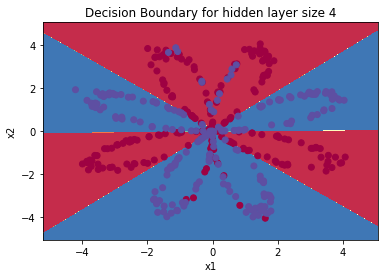

In [100]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [101]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.5 %


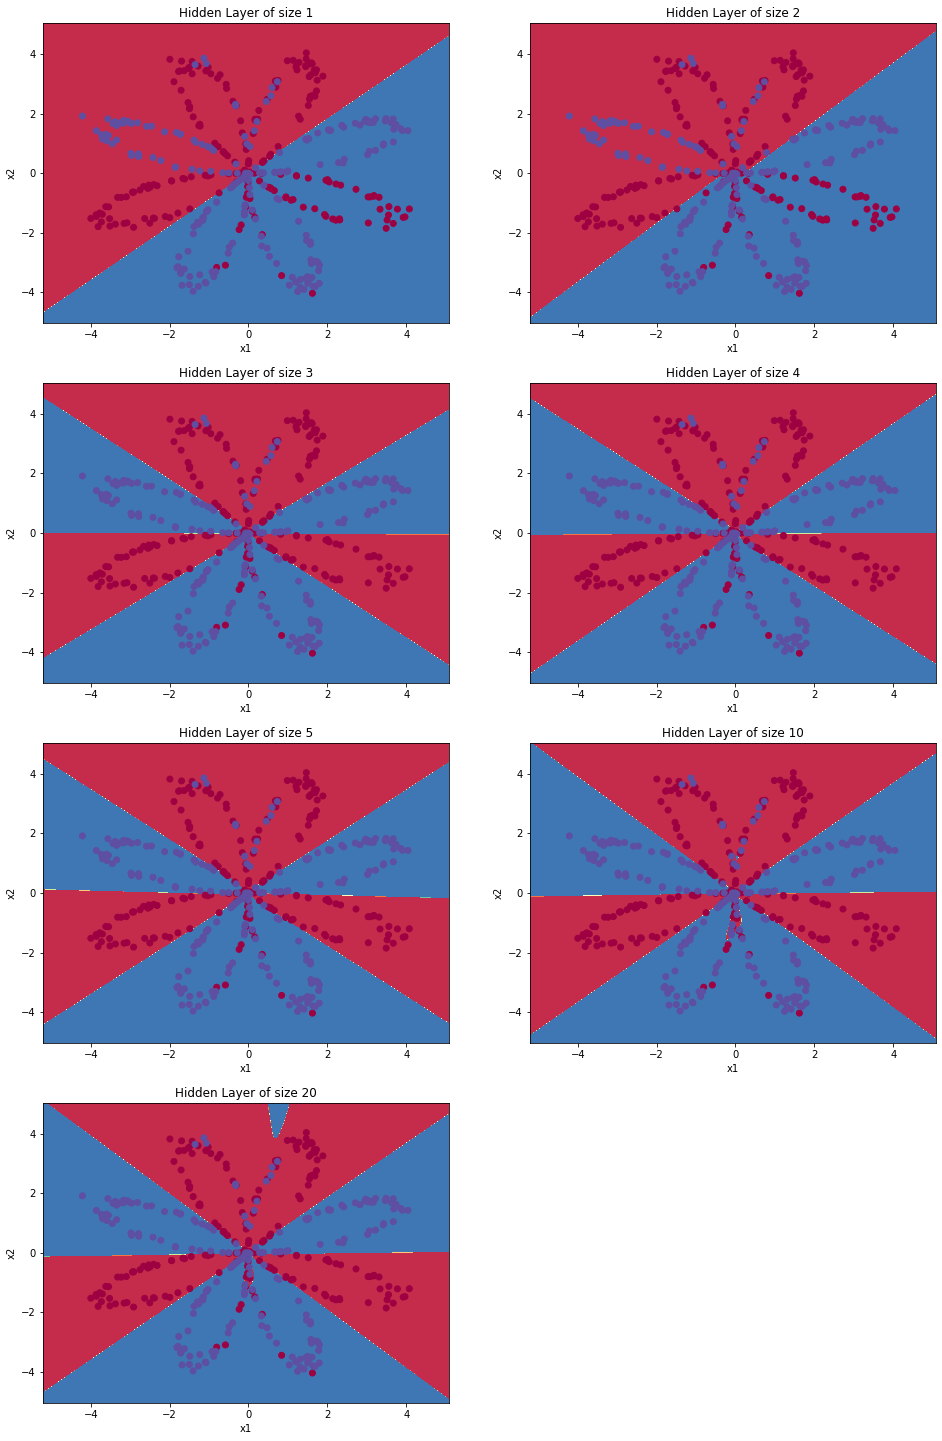

In [104]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))